<a href="https://colab.research.google.com/github/anacarolinedss/spanish-wine-analysis/blob/main/An%C3%A1lise_comparativa_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória de dados
*Equipe 7: DataMiners*



*   David Melo
*   Ana Caroline Santos
*   Kevely William
*  Debora Moseane Dos Santos
*   Beatriz Marques
*   Mariana Freitas
*   Pedro Filho
*  Mateus Jairan de Sousa Rodrigues








# **Dataset**

Este dataset contém informações sobre vinhos premium produzidos na Espanha, focando em características sensoriais, avaliação de usuários e aspectos comerciais. Cada linha representa um rótulo específico, incluindo detalhes sobre o produtor, safra, região, perfil sensorial e popularidade.

In [ ]:
# Importação de bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
# Caminho para o conjunto de dados
path = 'https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/spanish_wines.csv'

In [ ]:
# Leitura do CSV em um DataFrame
dados = pd.read_csv(path, sep=',')

In [ ]:
# Exibindo as primeiras linhas
dados.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# Exibindo as últimas 5 linhas
dados.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


# Dicionário da variaveis

Winery - A marca do vinho

Wine - O tipo de vinho

Year - O ano em que as uvas foram colhidas para fazer o vinho

rating - Nota média do vinho dada pelo usuarios

num_reviews - Número de usuarios que avaliaram o vinho

country - País de origem

region - Região do vinho

price - Preço em euros

type - Variedade do vinho

body - Peso do vinho em uma escala de 1-5 ( A sensação que o vinho faz ao paladar)

acidity - Acidez do vinho em uma escala de 1 á 5

In [ ]:
# Variáveis
dados.nunique()

,0
winery,480
wine,847
year,71
rating,8
num_reviews,817
country,1
region,76
price,1292
type,21
body,4


In [ ]:
# Estrutura geral dos dados
# Verificando quantas linhas tem, o tipo de dado de cada coluna e se falta algum valor

In [ ]:
dados_dict = pd.DataFrame([
    {
        "variavel": "winery",
        "descricao": "A marca do vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "wine",
        "descricao": "O tipo de vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "year",
        "descricao": "O ano em que as uvas foram colhidas para fazer o vinho",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "rating",
        "descricao": "Nota média do vinho dada pelos usuários",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "num_reviews",
        "descricao": "Número de usuários que avaliaram o vinho",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "country",
        "descricao": "País de origem",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "region",
        "descricao": "Região do vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "price",
        "descricao": "Preço em euros",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "type",
        "descricao": "Variedade do vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "body",
        "descricao": "Peso do vinho em uma escala de 1-5 (A sensação que o vinho faz ao paladar)",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "acidity",
        "descricao": "Acidez do vinho em uma escala de 1-5",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
])
display(dados_dict)

,variavel,descricao,tipo,subtipo
0,winery,A marca do vinho,qualitativa,nominal
1,wine,O tipo de vinho,qualitativa,nominal
2,year,O ano em que as uvas foram colhidas para fazer...,quantitativa,discreta
3,rating,Nota média do vinho dada pelos usuários,quantitativa,contínua
4,num_reviews,Número de usuários que avaliaram o vinho,quantitativa,discreta
5,country,País de origem,qualitativa,nominal
6,region,Região do vinho,qualitativa,nominal
7,price,Preço em euros,quantitativa,contínua
8,type,Variedade do vinho,qualitativa,nominal
9,body,Peso do vinho em uma escala de 1-5 (A sensação...,quantitativa,discreta


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB




---
Podemos notar valores faltantes em variáveis como 'year', 'type', 'body', 'acidity'

---




#Variáveis Qualitativas

In [ ]:
print(dados.describe(include='object'))

         winery     wine  year country region       type
count      7500     7500  7498    7500   7500       6955
unique      480      847    71       1     76         21
top     Contino  Reserva  2011  Espana  Rioja  Rioja Red
freq        457      467  1190    7500   2440       2357


#Variáveis Quantitativas

In [ ]:
print(dados.describe())

            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000




1.   rating:


*   Média: 4.2 - média dos vinhos avaliada acima de 4 estrelas
*   Máximo/Mínimo: 4.9 a 4.2 - Os vinhos estão tendo notas iguais
*   Desvio Padrão: 0.1 - Avaliações concentradas no meio, não estão muito dispersas


2.   num_reviews:

*   Média: 451 - Média das avaliações que os vinhos receberam
*   Máximo/Mínimo: 32624 a 25 - Há vinhos populares que recebem mais avaliações
*   Desvio Padrão: 723 - Há vinhos que são mais avaliados que outros

3.   price:

*   Média: 60 - A média não reflete a realidade dos valores, pois o vinho de valor mais alto
*   Máximo/Mínimo: 3119 a 4.9 - Há vinhos com valores mais altos
*   Desvio Padrão: 150.36 - Os preços sofrem uma grande variação

4.   body:

*   Média: 4.16 - A maioria dos vinhos não possuem a sensação de leveza no paladar
*   Máximo/Mínimo: 5 a 2 - Há muitos vinhos fortes
*   Desvio Padrão: 0.58 - Não há muita dispersão na sensação de peso e textura do vinho


5.   acidity:

*   Média: 2.94 - A maioria dos vinhos não são ácidos
*   Máximo/Mínimo: 3 a 1 - A escala de acidez dos vinhos é baixa
*   Desvio Padrão: 0.24 - Há uma acidez muito concentrada no meio

In [ ]:
# Tabela de frequência para variáveis qualitativas
for col in dados.select_dtypes(include='object').columns:
    print(f"\n{'='*60}")
    print(f"Tabela de frequência para '{col}'".center(60))
    print(f"{'='*60}\n")
    freq_df = dados[col].value_counts().reset_index()
    freq_df.columns = [col, 'Frequência']
    display(freq_df)


             Tabela de frequência para 'winery'             



,winery,Frequência
0,Contino,457
1,Artadi,261
2,La Rioja Alta,254
3,Sierra Cantabria,237
4,Matarromera,232
...,...,...
475,Loess,1
476,Dominio de Anza,1
477,Samsara,1
478,Cuentavinas,1



              Tabela de frequência para 'wine'              



,wine,Frequência
0,Reserva,467
1,Gran Reserva,458
2,Rioja Reserva,240
3,El Viejo,224
4,Valdegines,223
...,...,...
842,Territorio Luthier Reserva,1
843,La Baraja,1
844,Que Bonito Cacareaba Blanco,1
845,Alenza Ribera del Duero Gran Reserva,1



              Tabela de frequência para 'year'              



,year,Frequência
0,2011,1190
1,2016,897
2,2015,860
3,2018,850
4,2017,731
...,...,...
66,1928,1
67,1949,1
68,1922,1
69,1978,1



            Tabela de frequência para 'country'             



,country,Frequência
0,Espana,7500



             Tabela de frequência para 'region'             



,region,Frequência
0,Rioja,2440
1,Ribera del Duero,1413
2,Priorato,686
3,Toro,300
4,Vino de Espana,263
...,...,...
71,Otazu,1
72,Valdejalon,1
73,Terra Alta,1
74,Arribes,1



              Tabela de frequência para 'type'              



,type,Frequência
0,Rioja Red,2357
1,Ribera Del Duero Red,1407
2,Red,864
3,Priorat Red,674
4,Toro Red,296
5,Tempranillo,291
6,Sherry,274
7,Albarino,252
8,Mencia,235
9,Rioja White,92


In [ ]:
dados.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
dados.select_dtypes(include='object').nunique()

,0
winery,480
wine,847
year,71
country,1
region,76
type,21


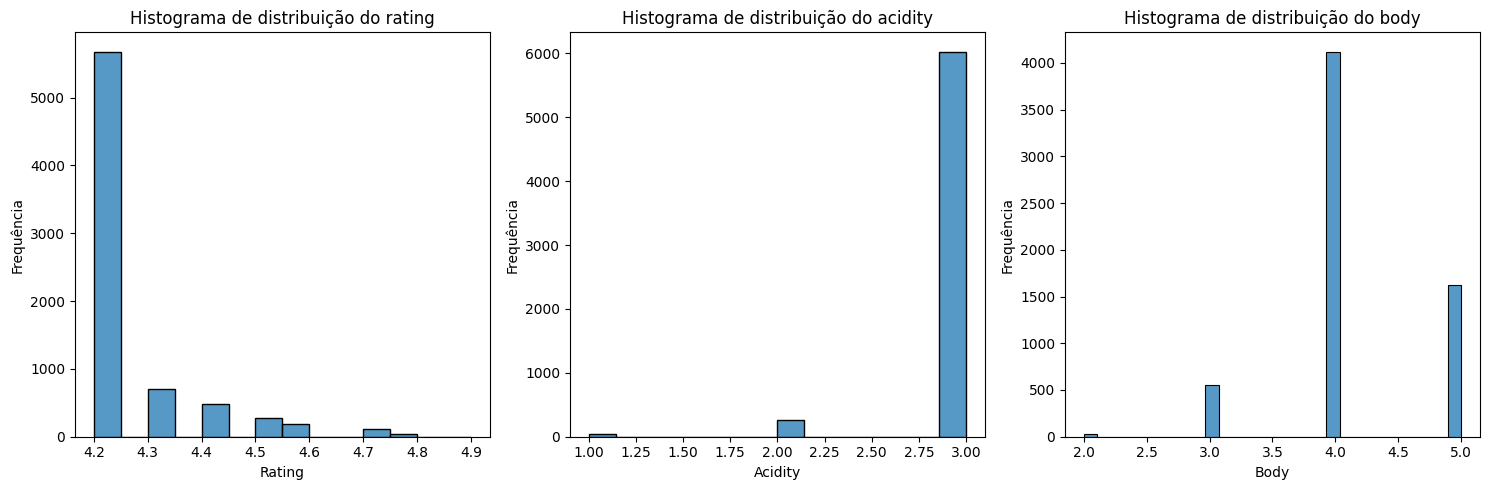

In [ ]:
#Salvando as varíaveis quantitativas em uma lista, e removendo a variavel preço
variavel_quant = dados.select_dtypes(include= np.number).columns.tolist()
variavel_quant.remove('price')

fig, ax = plt.subplots(1,3, figsize = (15,5))

#Histograma da variavel rating
sns.histplot(data = dados, x = 'rating', ax = ax[0])
ax[0].set_title('Histograma de distribuição do rating')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequência')

#Histograma da variavel acidity
sns.histplot(data = dados, x = 'acidity', ax = ax[1])
ax[1].set_title('Histograma de distribuição do acidity')
ax[1].set_xlabel('Acidity')
ax[1].set_ylabel('Frequência')

#Histograma da variavel acidity
sns.histplot(data = dados, x = 'body', ax = ax[2])
ax[2].set_title('Histograma de distribuição do body')
ax[2].set_xlabel('Body')
ax[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

---
- Avaliação (Rating): A maioria das avaliações se concentra em torno de 4.2. Notas mais altas são menos frequentes.

- Acidez (Acidity): A vasta maioria dos dados de acidez está fixada em 3.0, com quase nenhuma variação.

- Peso do Vinho (body): A maioria dos vinhos está nos níveis 4.0 e 5.0, sugerindo preferência por vinhos mais encorpados. Há também presença significativa no nível 3.0.


---

In [ ]:
dados['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

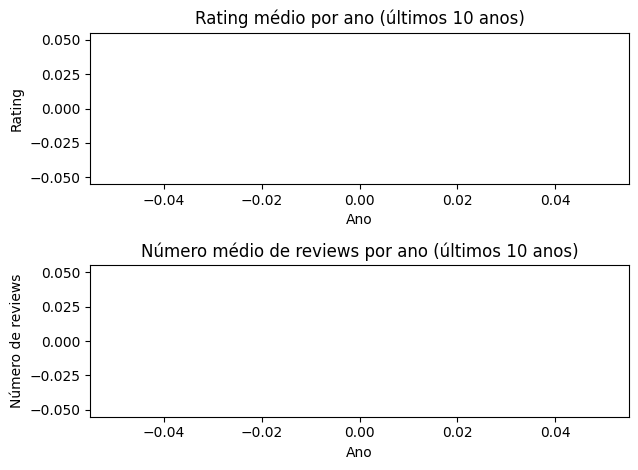

In [ ]:
#Gráfico de análise temporal do rating ao longo dos anos, um corte de 10 anos de 2015 a 2025

#fig, ax = plt.subplots(1,2,figsize = (5,15))
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
rating_year = dados[dados['year'].isin(years)].groupby('year')['rating'].mean()

#Gráfico 1 de rating médio por ano
plt.subplot(2,1,1)
plt.plot(rating_year, marker ='o')
plt.title('Rating médio por ano (últimos 10 anos)')
plt.xlabel('Ano')
plt.ylabel('Rating')


#Gráfico 2 de número médio de reviews por ano
plt.subplot(2,1,2)
num_reviews_year = dados[dados['year'].isin(years)].groupby('year')['num_reviews'].mean()
plt.plot(num_reviews_year, marker ='o')
plt.title('Número médio de reviews por ano (últimos 10 anos)')
plt.xlabel('Ano')
plt.ylabel('Número de reviews')

plt.tight_layout()
plt.show()

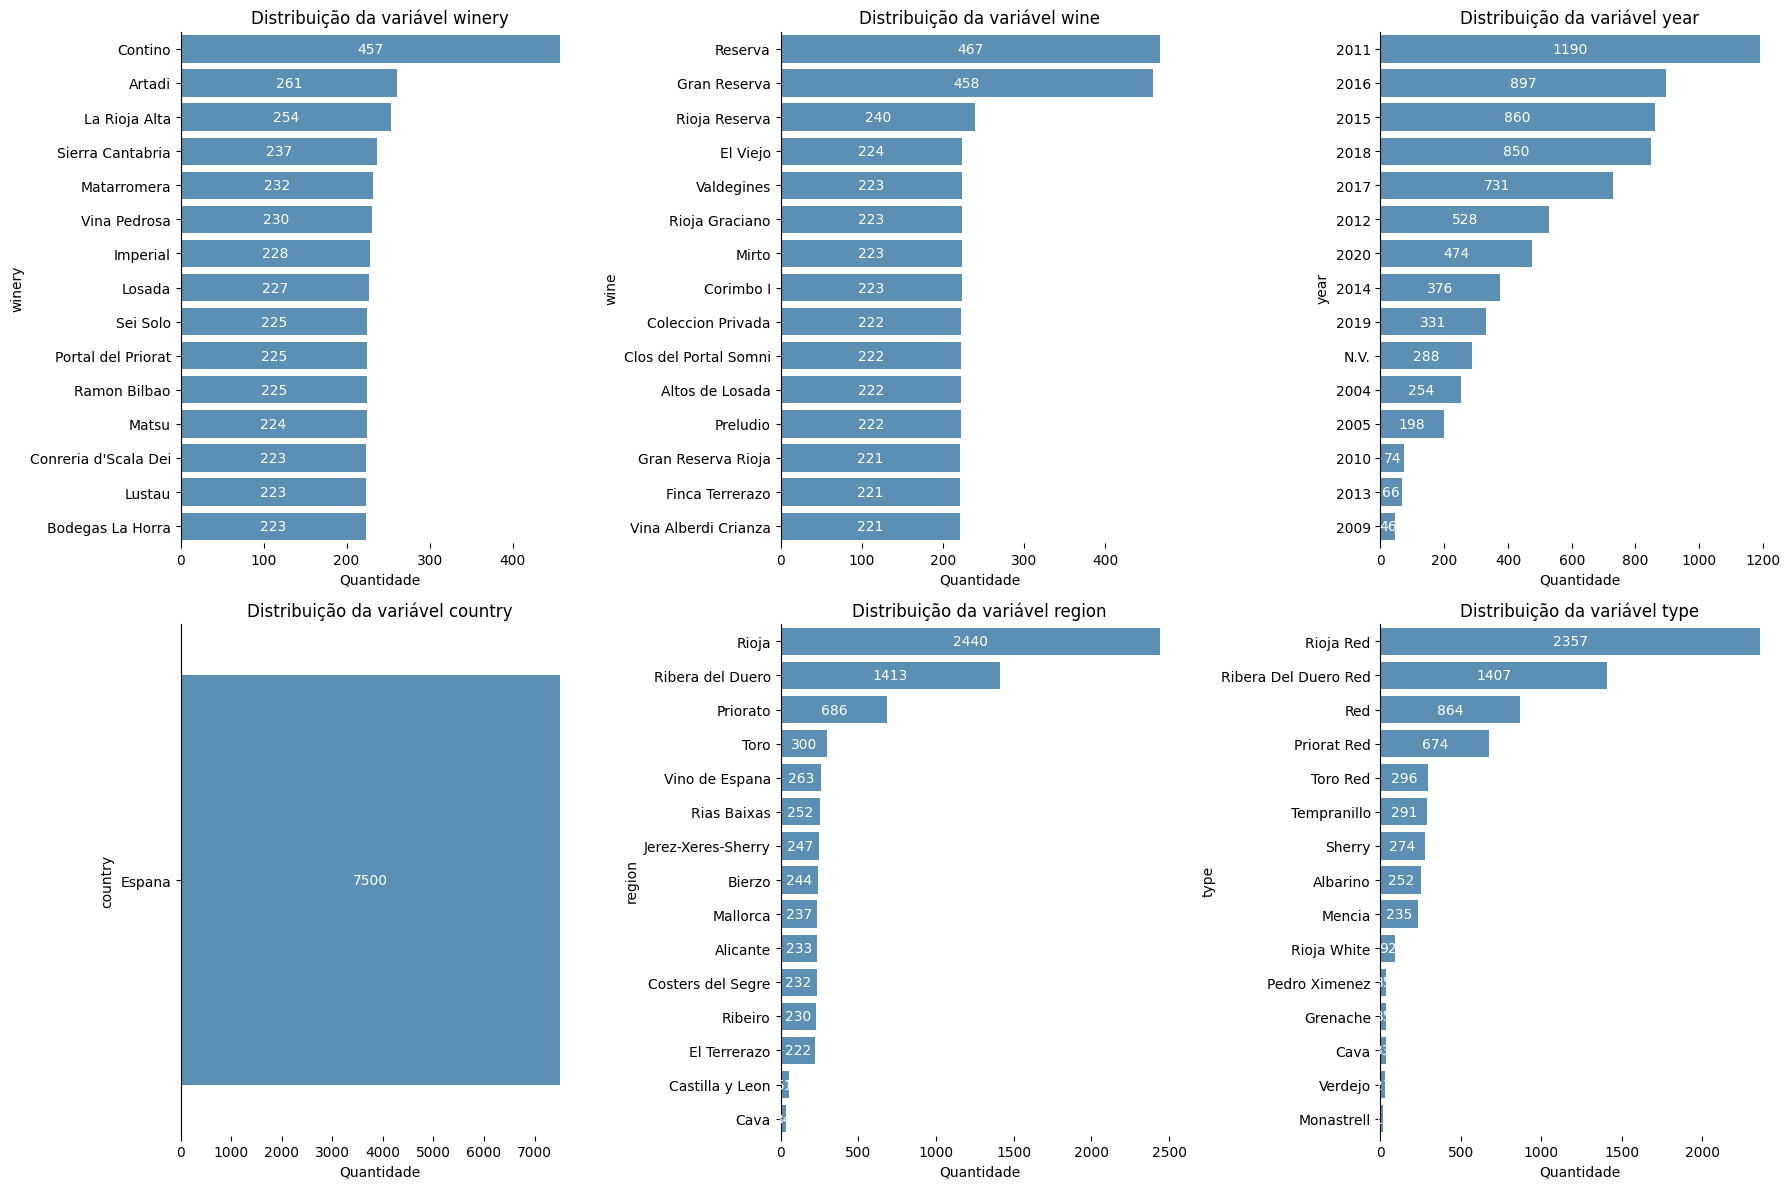

In [ ]:
variaveis_qualitativas = dados.select_dtypes(include='object').columns.to_list()

fig, axes = plt.subplots(figsize=(18, 12), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
  #Selecionando as 15 categorias mais comuns
  top_values = dados[variavel].value_counts().nlargest(15).index
  dados_filtrados = dados[dados[variavel].isin(top_values)]

  order = dados_filtrados[variavel].value_counts().index
  ax = sns.countplot(data=dados_filtrados, y=variavel, ax=axes[i], order=order, alpha=.8)
  ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
  ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
  for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()





---



*   Vinhos tintos da região de Rioja são os maiores tipos de vinhos da base de Dados
*   2011 foi um ano de safra excelente, registrando o maior número de vinhos
*   Algumas vinícolas dominam, como Contino e La Rioja Alta



---







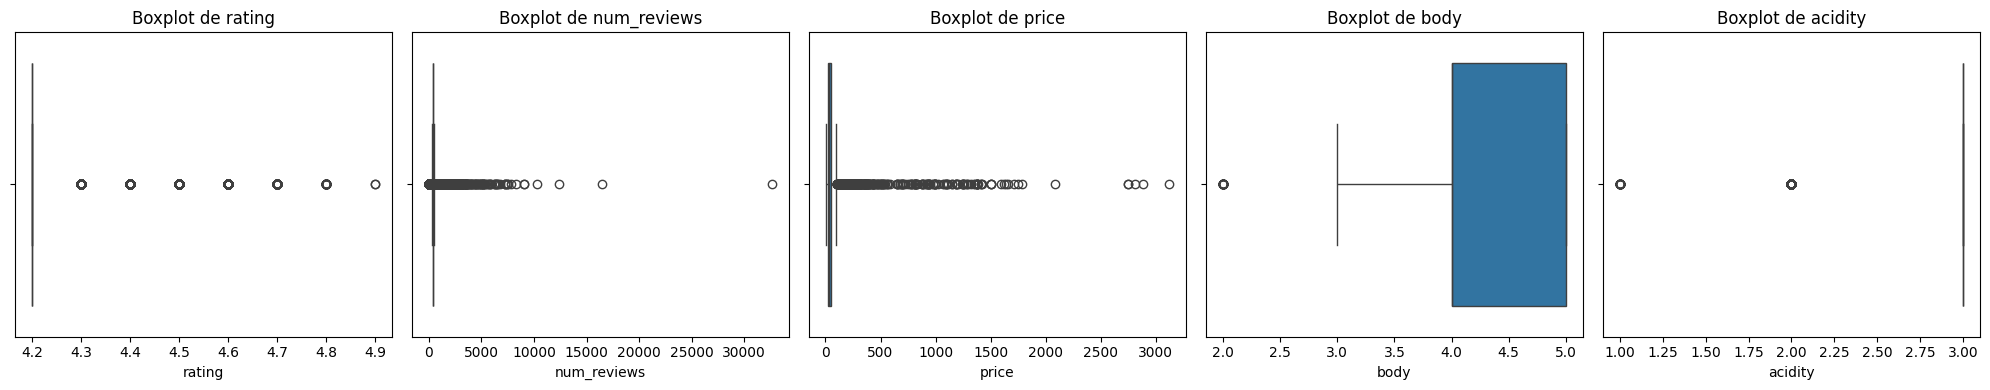

In [ ]:
variaveis_quantitativas = dados.select_dtypes(np.number).columns.to_list()

fig, axes = plt.subplots(figsize=(20, 4), ncols=5, nrows=1)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_quantitativas):
    sns.boxplot(data=dados, x=variavel, ax=axes[i])
    axes[i].set_title(f'Boxplot de {variavel}')

plt.tight_layout()
plt.show()



---


*   Pouca variabilidade no rating. Talvez as notas não sejam tão confiáveis para diferenciação fina entre vinhos.
*   A maioria dos vinhos tem poucas reviews (alta densidade à esquerda)
*   Muitos vinhos com preço abaixo de R$ 500, mas outliers com preço acima de 2000
*  Vinhos mais encorpados são maioria
*  Pouquíssima variação visível de acidez



---






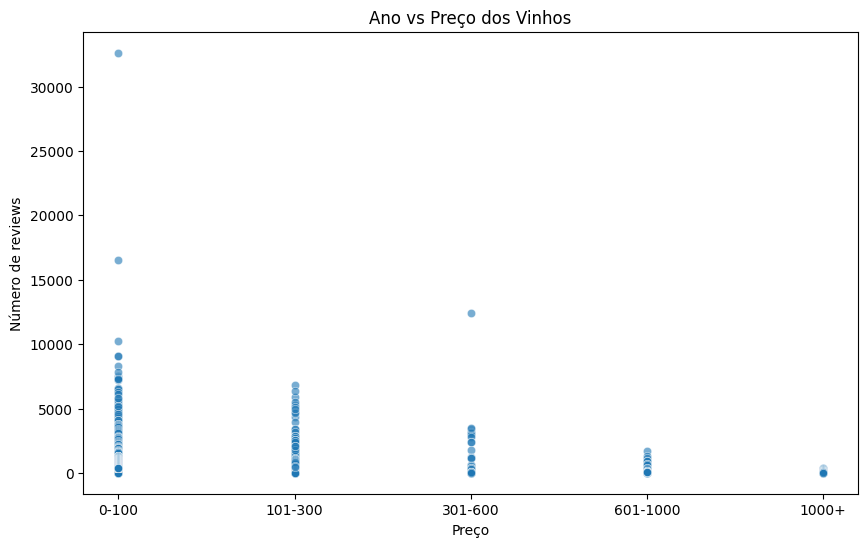

In [ ]:
#Gráfico de correlação entre todas as variaveis númericas(sns.heatmap) e scatterplot - A fazer

dados['year'] = pd.to_numeric(dados['year'], errors='coerce')

dados['faixa_preco'] = pd.cut(dados['price'],
                              bins=[0, 100, 300, 600, 1000, dados['price'].max()],
                              labels=['0-100', '101-300', '301-600', '601-1000', '1000+'])

plt.figure(figsize=(10,6))

sns.scatterplot(x='faixa_preco', y='num_reviews', data=dados, alpha=0.6)

plt.title('Ano vs Preço dos Vinhos')
plt.xlabel('Preço')
plt.ylabel('Número de reviews')
plt.grid(False)
plt.show()

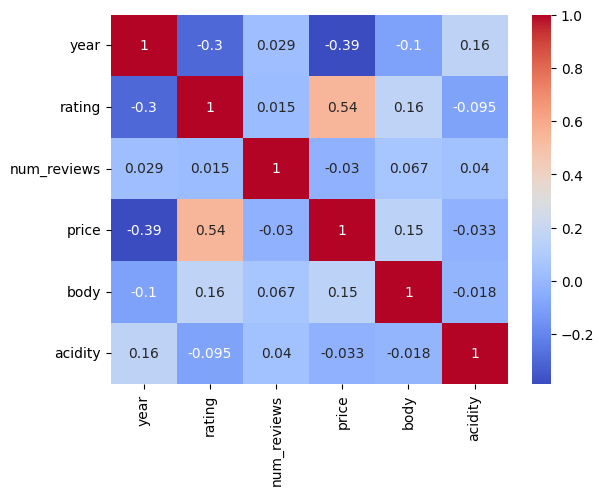

In [ ]:
dados_quant = dados.select_dtypes(include=np.number)
corr = dados_quant.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

---
**Insight 1** - Vinhos com preços mais baixos tendem a receber mais avaliações. O que sugere que vinhos mais acessíveis são consumidos por um público mais engajado, aumentando a chance de serem avaliados com mais frequência.

**Insight 2** - Vinhos mais caros tendem a receber notas maiores, o que sugere maior qualidade em vinhos de maior preço.

**Insight 3** - Quanto mais antigo o vinho, maior é o preço; quanto mais recente o ano do vinho, menor tende a ser o preço. Isso ocorre provavelmente porque vinhos com períodos mais longos de envelhecimento são reservados por mais tempo, o que tende a melhorar sua qualidade e valor percebido. Além disso, a alta popularidade do vinho provavelmente também contribui para o aumento do preço.


---

Há valores faltantes nas colunas  como 'year', 'type', 'body', 'acidity' o que pode influenciar na análise dos dados, além disso, há outliers em variáveis como o de número de reviews, o que também podem influenciar

In [ ]:
#Verificando a porcentagens de valores ausentes

nan_porcentagem = dados.isnull().mean() * 100
nan_porcentagem.name = 'Porcentagem'
nan_porcentagem.sort_values(ascending=True)

,Porcentagem
winery,0.000000
wine,0.000000
rating,0.000000
num_reviews,0.000000
region,0.000000
country,0.000000
price,0.000000
faixa_preco,0.000000
year,3.866667
type,7.266667


É possível observar que temos valores nulos nas colunas de 'year', 'type', 'body' e 'acidity'. Uma interessante observação é que 'body' e 'acidity' têm ambos a mesma porcentagem de valores nulos, podendo indicar possível padrão de ausência MAR nos dados

# **Observação e Tratamento de Valores Ausentes**

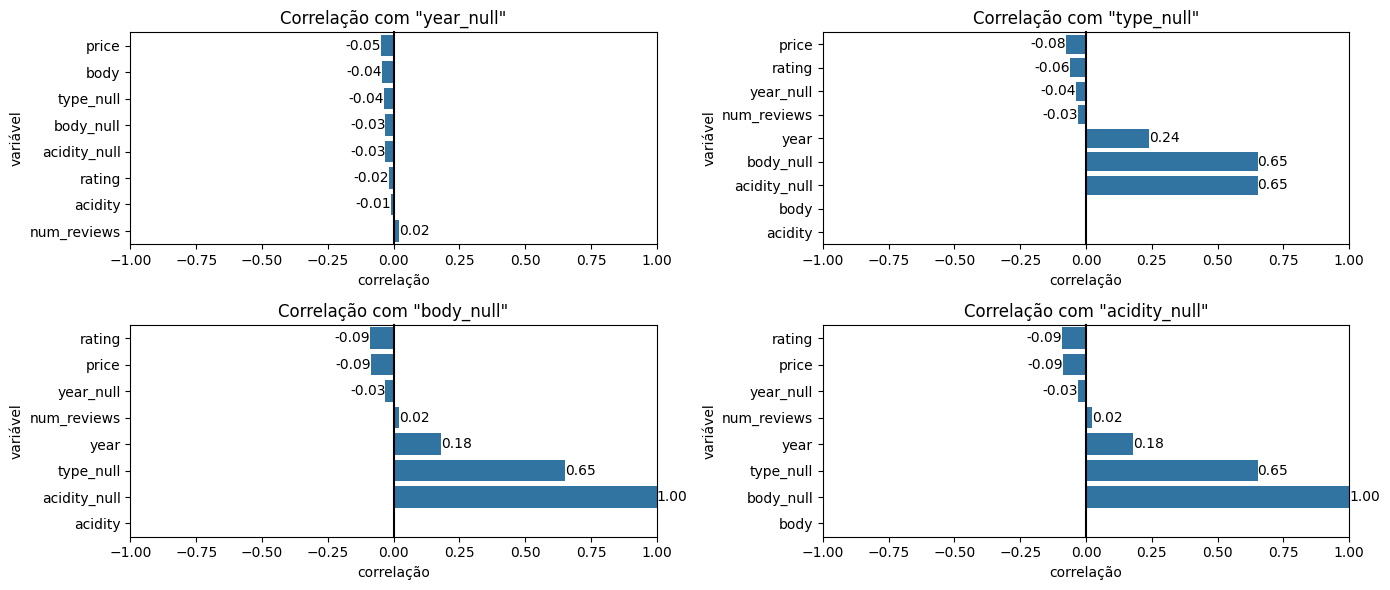

In [ ]:
df_null = dados.loc[:,dados.isnull().sum() > 0].isnull()
df_ = dados.copy()
null_columns = []

for column in df_null.columns:
  null_columns.append(f"{column}_null")
  df_[f"{column}_null"] = df_null[column]

df_corr = df_.corr(numeric_only=True)

def plot_corr(ax, col_null, exclude_cols):
    graph_df = df_corr[null_columns].reset_index(names='variable')
    graph_df = graph_df.query(f"variable not in {exclude_cols}")
    sns.barplot(
        data=graph_df,
        x=col_null, y='variable',
        order=graph_df.sort_values(by=col_null).variable,
        ax=ax
    )
    ax.set(
        xlim=[-1, 1], xlabel='correlação', ylabel='variável',
        title=f'Correlação com "{col_null}"'
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    ax.axvline(0, color="k", clip_on=False)

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()

# Chamada da função para cada variável
plot_corr(axes[0], 'year_null', ["year_null", "year"])
plot_corr(axes[1], 'type_null', ["type_null", "type"])
plot_corr(axes[2], 'body_null', ["body_null", "body"])
plot_corr(axes[3], 'acidity_null', ["acidity_null", "acidity"])

plt.tight_layout()
plt.show()

É possível notar que as colunas faltantes de 'type', 'body' e 'acidity' têm fortes correlações entre elas, indicando padrão MAR para valores ausentes, ou seja, a ausência de valores de uma destas colunas depende de informações das outras duas colunas.

## **Imputação para Variáveis Quantitativas**


---



# **Imputação por estatísticas de tendência central (SimpleImputer)**

/tmp/ipython-input-24-1320769621.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])
/tmp/ipython-input-24-1320769621.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])
/tmp/ipython-input-24-1320769621.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])


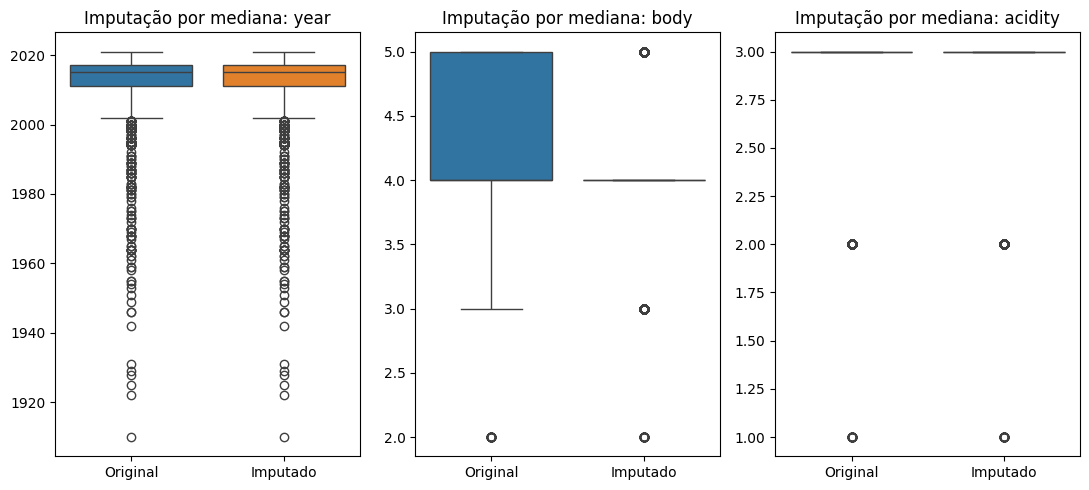

In [ ]:
def box_plot_simple_imputer(ax, coluna):
    imputer = SimpleImputer(strategy='median')
    imputer.fit(dados[[coluna]])

    # Cria coluna imputada
    dados[f"imputed_{coluna}"] = imputer.transform(dados[[coluna]])

    # Plota os dois boxplots lado a lado
    sns.boxplot(data=dados[[coluna, f"imputed_{coluna}"]], ax=ax)
    ax.set_title(f'Imputação por mediana: {coluna}')
    ax.set_xticklabels(['Original', 'Imputado'])

    dados.drop(columns=f"imputed_{coluna}", inplace=True)

# Criar os subplots
fig, axes = plt.subplots(1, 3, figsize=(11,5))
axes = axes.flatten()

# Gerar os boxplots
box_plot_simple_imputer(axes[0], 'year')
box_plot_simple_imputer(axes[1], 'body')
box_plot_simple_imputer(axes[2], 'acidity')

plt.tight_layout()
plt.show()



---

Nota-se que as colunas de 'body' e 'acidity' ficaram bem achatadas após imputação com SimpleImputer, indicando que muitos valores ausentes foram preenchidos com um único valor (a mediana), o que significa que há risco de viés nos dados. Talvez, esta não seja a melhor estratégia de imputação para estes dados.


---



# **Imputação por hot-deck (KNNImputer)**

In [ ]:
numeric_columns = dados.select_dtypes(include=['number']).columns

imputer = KNNImputer()
imputer.fit(dados[numeric_columns])

KNNImputer()

In [ ]:
def box_plot_knn_imputer(ax, column, model):
    imputed_array = model.transform(dados[numeric_columns])
    imputed_df = pd.DataFrame(imputed_array, columns=numeric_columns)

    dados[f"imputed_{column}"] = imputed_df[column]

    sns.boxplot(data=dados[[column, f"imputed_{column}"]], ax=ax)
    ax.set_title(f'Imputação por hot-deck: {column}')
    ax.set_xticklabels(['Original', 'Imputado'])

    dados.drop(columns=f"imputed_{column}", inplace=True)

/tmp/ipython-input-26-1926495236.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])
/tmp/ipython-input-26-1926495236.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])
/tmp/ipython-input-26-1926495236.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Original', 'Imputado'])


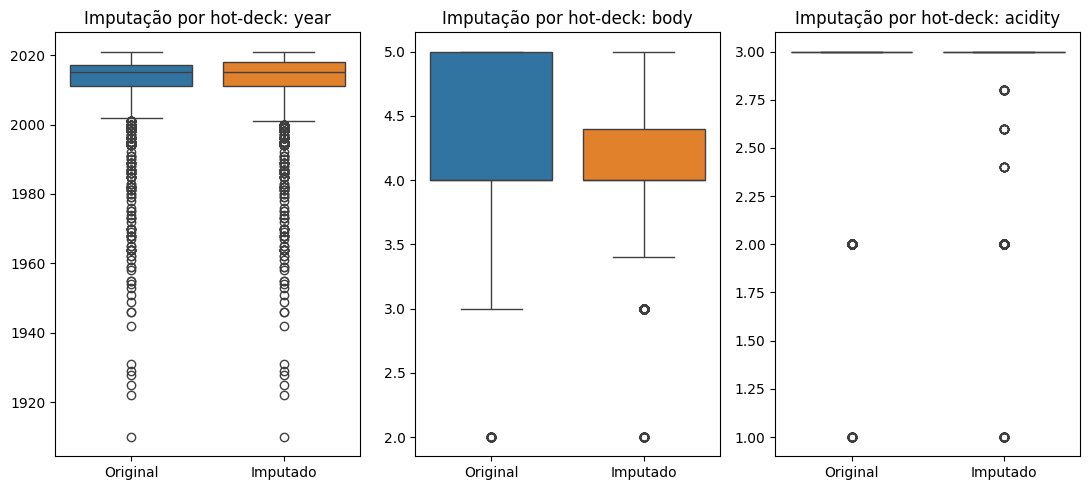

In [ ]:
# Criar os subplots
fig, axes = plt.subplots(1, 3, figsize=(11,5))
axes = axes.flatten()

# Gerar os boxplots
box_plot_knn_imputer(axes[0], 'year', imputer)
box_plot_knn_imputer(axes[1], 'body', imputer)
box_plot_knn_imputer(axes[2], 'acidity', imputer)

plt.tight_layout()
plt.show()



---

A partir desta imputação, é possível observar que, desta vez, a imputação foi conservadora e preservou bem os padrões originais.


*   **year**: Versão mais "limpa", pode ter ignorado alguns outliers. Isso pode ser bom para estabilidade, mas pode mascarar dados reais antigos.
*   **body**: A imputação foi conservadora.
*   **acidity**: Muito poucos valores diferentes entre original e imputado.



---




In [ ]:
def imputer_columns(coluna):

  imputer = KNNImputer()
  imputer.fit(dados[[coluna]])
  dados[coluna] = imputer.transform(dados[[coluna]])


imputer_columns('body')
imputer_columns('acidity')
imputer_columns('year')

# **Imputação Para Variáveis Qualitativas**


---



In [ ]:
dados['type'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)



---
Como visto anteriormente, a coluna de 'type' obtém de pouco mais de 7% dos valores nulos no dataset. Podemos considerar isso uma baixa ocorrência de valores nulos em comparação com o tamanho do conjunto de dados, portanto, optamos pela exclusão dos valores nulos desta coluna.


---




In [ ]:
dados = dados.dropna(subset=['type'])

In [ ]:
bins_dict = {
    'Toro Red': 'Tinto',
    'Tempranillo': 'Uva Tinta',
    'Ribera Del Duero Red': 'Tinto',
    'Pedro Ximenez': 'Licoroso',
    'Red': 'Tinto',
    'Sherry': 'Licoroso',
    'Priorat Red': 'Tinto',
    'Rioja Red': 'Tinto',
    'Rioja White': 'Branco',
    'Grenache': 'Uva Tinta',
    'Cava': 'Espumante',
    'Verdejo': 'Branco',
    'Syrah': 'Uva Tinta',
    'Monastrell': 'Uva Tinta',
    'Mencia': 'Uva Tinta',
    'Sparkling': 'Espumante',
    'Montsant Red': 'Tinto',
    'Albarino': 'Branco',
    'Chardonnay': 'Branco',
    'Cabernet Sauvignon': 'Uva Tinta',
    'Sauvignon Blanc': 'Branco',
}

dados['vinhos_grupos'] = dados['type'].map(bins_dict)

/tmp/ipython-input-31-1954913751.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['vinhos_grupos'] = dados['type'].map(bins_dict)




---

Foi feito um agrupamento das categorias de 'type' para melhor manipulação com One Hot Encoder


---



In [ ]:
dummies = pd.get_dummies(dados['vinhos_grupos'], prefix='type')
dados = pd.concat([dados, dummies], axis=1)

In [ ]:
dados = dados.drop('type', axis=1)

In [ ]:
dados.head()

,winery,wine,year,rating,num_reviews,country,region,price,body,acidity,faixa_preco,vinhos_grupos,type_Branco,type_Espumante,type_Licoroso,type_Tinto,type_Uva Tinta
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,5.0,3.0,601-1000,Tinto,False,False,False,True,False
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,4.0,2.0,301-600,Uva Tinta,False,False,False,False,True
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,5.0,3.0,301-600,Tinto,False,False,False,True,False
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,5.0,3.0,601-1000,Tinto,False,False,False,True,False
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,5.0,3.0,601-1000,Tinto,False,False,False,True,False


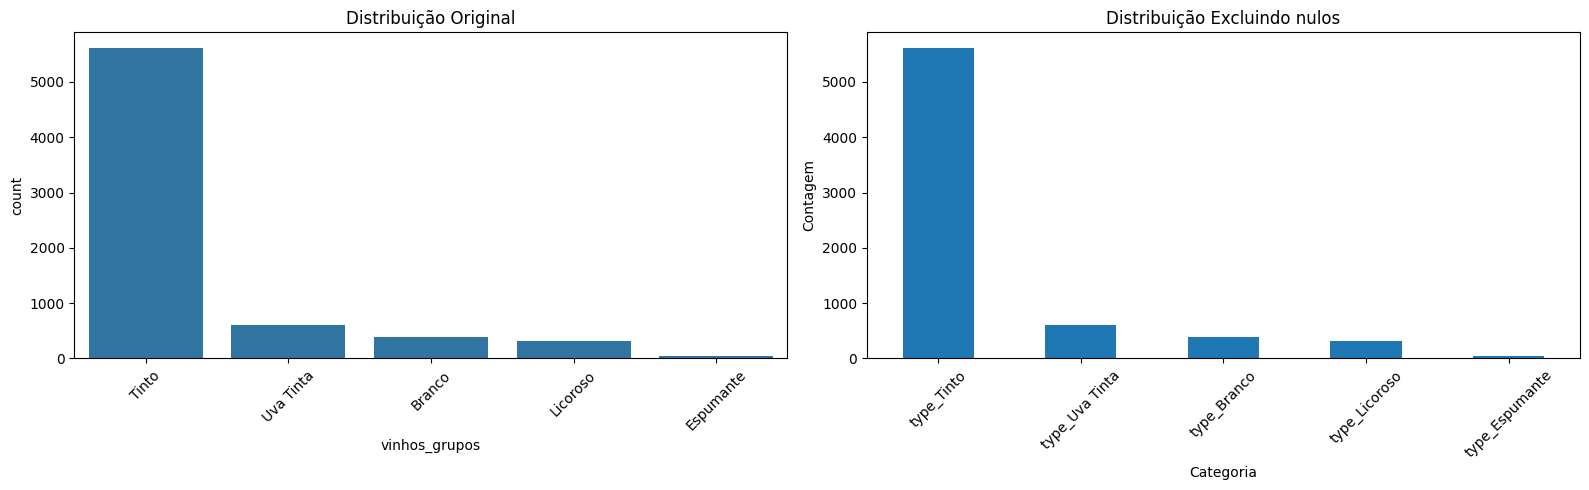

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico da coluna original
sns.countplot(x='vinhos_grupos', data=dados, ax=axs[0], order=dados['vinhos_grupos'].value_counts().index)
axs[0].set_title('Distribuição Original')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico da soma dos dummies (one-hot)
counts = dados[dummies.columns].sum().sort_values(ascending=False)
counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribuição Excluindo nulos')
axs[1].set_ylabel('Contagem')
axs[1].set_xlabel('Categoria')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



---

A exclusão de nulos não distorceu a distribuição geral, ou seja, os dados continuam representando bem a realidade original.



---



# **Codificando outras variáveis categóricas**

In [ ]:
dados.head()

,winery,wine,year,rating,num_reviews,country,region,price,body,acidity,faixa_preco,vinhos_grupos,type_Branco,type_Espumante,type_Licoroso,type_Tinto,type_Uva Tinta
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,5.0,3.0,601-1000,Tinto,False,False,False,True,False
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,4.0,2.0,301-600,Uva Tinta,False,False,False,False,True
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,5.0,3.0,301-600,Tinto,False,False,False,True,False
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,5.0,3.0,601-1000,Tinto,False,False,False,True,False
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,5.0,3.0,601-1000,Tinto,False,False,False,True,False


In [ ]:
dados['winery'].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Bodegas Roda', 'Martinet', 'Recaredo',
       'Clos Erasmus', 'Barbadillo', 'Gonzalez-Byass', 'Bodegas Amaren',
       'Alvear', 'Equipo Navazos', 'Morca', 'Territorio Luthier',
       'Terra Remota', 'Dehesa de Los Canonigos', 'Miguel Merino',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa Castillo', 'Matarromera', 'Nin-Ortiz',
       'Vinas del Vero', 'Ma

Agrupamos esta coluna pelos nomes dos mais frequentes e outros

In [ ]:
freq = dados['winery'].value_counts()

limiar = 250

categorias_comuns = freq[freq > limiar].index

dados['winery'] = dados['winery'].apply(lambda x: x if x in categorias_comuns else 'Outros')


In [ ]:
dados['winery'].unique()

array(['Outros', 'Artadi', 'La Rioja Alta', 'Contino'], dtype=object)

In [ ]:
dados['wine'].unique()

array(['Tinto', 'Vina El Pison', 'Unico',
       'Unico Reserva Especial Edicion', 'El Anejon',
       'Don PX Convento Seleccion', 'Cuesta de Las Liebres', 'El Nido',
       'Toneles Moscatel', 'Pingus', 'Don PX Pedro Ximenez',
       "L'Ermita Velles Vinyes Priorat", 'Vatan Arena Tinta de Toro',
       'Ribera Del Duero Gran Reserva 12 Anos', 'Pesus Ribera del Duero',
       'Magico', 'La Faraona Bierzo (Corullon)', 'Gran Reserva 890',
       'Valbuena 5o', 'Castillo Ygay Gran Reserva Especial Blanco',
       'La Nieta', 'Malleolus de Valderramiro',
       'Malleolus de Sanchomartin', 'Alabaster', 'La Mula de la Quietud',
       'Terreus Paraje de Cueva Baja', 'Contador Rioja',
       'Maria Remirez de Ganuza', 'Cartago Paraje de Pozo',
       'Parcela El Picon Tinto', 'Termanthia', 'Clon De La Familia',
       'Aquilon Garnacha', 'Quinon de Valmira',
       '1902 Centenary Carignan Priorat', 'Cirsion Rioja',
       'Cami Pesseroles', "Turo d'en Mota", 'Priorat',
       'Reliquia Pal

In [ ]:
limiar = 230

frequentes = dados['wine'].value_counts()
mais_comuns = frequentes[frequentes > limiar].index

dados['wine'] = dados['wine'].apply(lambda x: x if x in mais_comuns else 'Outros')


In [ ]:
dados['wine'].unique()

array(['Outros', 'Gran Reserva', 'Reserva', 'Rioja Reserva'], dtype=object)

In [ ]:
dados['country'].unique()

array(['Espana'], dtype=object)



---
Como o único país no dataset se refere à Espanha, podemos retirar esta coluna


---




In [ ]:
dados = dados.drop('country', axis=1)

In [ ]:
dados['region'].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cava', 'Jerez Palo Cortado',
       'Manzanilla', 'Emporda', 'Rioja Alta', 'Somontano',
       'Dominio de Valdepusa', 'Mallorca', 'Yecla', 'Cigales',
       'Utiel-Requena', 'Rioja Alavesa', 'Cadiz', 'Costers del Segre',
       'Sardon de Duero', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Navarra', 'Tierra del Vino de Zamora', 'Penedes',
       'Dehesa del Carrizal', 'Madrid', 'Carinena', 'Alicante',
       'Condado de Huelva', 'Almansa', 'Jerez Cream', 'Malaga',
       'Valencia', 'Sierras de Malaga', 'El Terrerazo', 'Jerez Oloroso',
       'Castilla', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Gallego-Cinco Villas', 'Aragon',
       'Binissalem-Mallorca', 'Calatayud', 'Pla 

In [ ]:
freq_regioes = dados['region'].value_counts()
limiar = 100

regioes_comuns = freq_regioes[freq_regioes > limiar].index

dados['region'] = dados['region'].apply(lambda x: x if x in regioes_comuns else 'Outros')


In [ ]:
colunas = ['winery', 'wine', 'region']

for c in colunas:
  dummies = pd.get_dummies(dados[c], prefix=c)
  dados = pd.concat([dados, dummies], axis=1)

In [ ]:
dados.head()

,winery,wine,year,rating,num_reviews,region,price,body,acidity,faixa_preco,...,region_Costers del Segre,region_El Terrerazo,region_Jerez-Xeres-Sherry,region_Outros,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana
0,Outros,Outros,2013.0,4.9,58,Toro,995.00,5.0,3.0,601-1000,...,False,False,False,False,False,False,False,False,True,False
1,Artadi,Outros,2018.0,4.9,31,Vino de Espana,313.50,4.0,2.0,301-600,...,False,False,False,False,False,False,False,False,False,True
2,Outros,Outros,2009.0,4.8,1793,Ribera del Duero,324.95,5.0,3.0,301-600,...,False,False,False,False,False,False,True,False,False,False
3,Outros,Outros,1999.0,4.8,1705,Ribera del Duero,692.96,5.0,3.0,601-1000,...,False,False,False,False,False,False,True,False,False,False
4,Outros,Outros,1996.0,4.8,1309,Ribera del Duero,778.06,5.0,3.0,601-1000,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
colunas = ['winery', 'wine', 'region', 'vinhos_grupos']

for c in colunas:
  dados = dados.drop(c, axis=1)

In [ ]:
dados.head()

,year,rating,num_reviews,price,body,acidity,faixa_preco,type_Branco,type_Espumante,type_Licoroso,...,region_Costers del Segre,region_El Terrerazo,region_Jerez-Xeres-Sherry,region_Outros,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana
0,2013.0,4.9,58,995.00,5.0,3.0,601-1000,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2018.0,4.9,31,313.50,4.0,2.0,301-600,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2009.0,4.8,1793,324.95,5.0,3.0,301-600,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1999.0,4.8,1705,692.96,5.0,3.0,601-1000,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1996.0,4.8,1309,778.06,5.0,3.0,601-1000,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
dados['faixa_preco'].unique()

['601-1000', '301-600', '101-300', '1000+', '0-100']
Categories (5, object): ['0-100' < '101-300' < '301-600' < '601-1000' < '1000+']

In [ ]:
ordem = ['0-100', '101-300', '301-600', '601-1000', '1000+']

encoder = OrdinalEncoder(categories=[ordem])

dados['faixa_preco'] = encoder.fit_transform(dados[['faixa_preco']])

In [ ]:
dados['year'].unique()

array([2013.        , 2018.        , 2009.        , 1999.        ,
       1996.        , 1998.        , 2010.        , 1995.        ,
       2015.        , 2011.        , 2016.        , 1970.        ,
       1946.        , 1962.        , 2019.        , 2004.        ,
       2013.49583911, 1931.        , 1979.        , 2005.        ,
       2020.        , 2014.        , 1985.        , 1929.        ,
       2007.        , 2012.        , 2017.        , 2008.        ,
       2006.        , 2000.        , 2003.        , 2002.        ,
       1991.        , 1994.        , 1990.        , 1989.        ,
       1987.        , 1986.        , 1981.        , 2001.        ,
       1968.        , 1964.        , 1982.        , 1974.        ,
       1983.        , 1955.        , 1980.        , 1972.        ,
       1953.        , 1958.        , 1942.        , 1965.        ,
       1992.        , 1973.        , 1997.        , 1967.        ,
       1975.        , 1910.        , 1961.        , 1954.     

In [ ]:
dados['year'] = dados['year'].round().astype(int)

In [ ]:
dados['year'].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004, 1931, 1979, 2005, 2020, 2014, 1985,
       1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991, 1994,
       1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974, 1983,
       1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997, 1967,
       1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949, 2021,
       1959, 1922, 1978, 1925])



---


Utilizaremos a técnica de bins para agrupar as categorias de anos em 'Muito antigo', 'Antigo', 'Médio', 'Recente', 'Atual'



---



In [ ]:
bins = [1900, 1950, 1980, 2000, 2010, 2025]

labels = ['Muito antigo', 'Antigo', 'Médio', 'Recente', 'Atual']

dados['year'] = pd.cut(dados['year'], bins=bins, labels=labels)

In [ ]:
#Agora que temos uma ordem estabelecida, podemos codificar com Ordinal Encoder

ordem = [['Muito antigo', 'Antigo', 'Médio', 'Recente', 'Atual']]

encoder = OrdinalEncoder(categories=ordem)

dados['year'] = encoder.fit_transform(dados[['year']])

In [ ]:
dados.head()

,year,rating,num_reviews,price,body,acidity,faixa_preco,type_Branco,type_Espumante,type_Licoroso,...,region_Costers del Segre,region_El Terrerazo,region_Jerez-Xeres-Sherry,region_Outros,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana
0,4.0,4.9,58,995.00,5.0,3.0,3.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,4.0,4.9,31,313.50,4.0,2.0,2.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3.0,4.8,1793,324.95,5.0,3.0,2.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2.0,4.8,1705,692.96,5.0,3.0,3.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2.0,4.8,1309,778.06,5.0,3.0,3.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
#Separando em features e target

X = dados.drop('rating', axis=1)
y = dados['rating']

# **Separação para Conjuntos de Treino e Teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Padronizando os dados para mesma escala

# Padronizar X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Padronizar y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train_scaled

array([[ 0.33926309, -0.06150323, -0.32093847, ...,  1.35388105,
        -0.21324077, -0.19309482],
       [-3.86956598, -0.56723308,  1.04038441, ...,  1.35388105,
        -0.21324077, -0.19309482],
       [ 0.33926309, -0.09047733, -0.19915081, ..., -0.73861733,
        -0.21324077, -0.19309482],
       ...,
       [ 0.33926309, -0.08784332, -0.24759599, ..., -0.73861733,
        -0.21324077, -0.19309482],
       [-1.76515144, -0.09574535,  0.07998245, ...,  1.35388105,
        -0.21324077, -0.19309482],
       [ 0.33926309, -0.4618727 , -0.082626  , ..., -0.73861733,
        -0.21324077, -0.19309482]])

In [ ]:
y_train_scaled

array([[-0.46792367],
       [ 4.55980844],
       [-0.46792367],
       ...,
       [-0.46792367],
       [-0.46792367],
       [ 1.20798704]])

# **Validação de modelos**


In [ ]:
# Convert y_train_scaled to 1D array
y_train_scaled_1d = y_train_scaled.ravel()

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Linear Regression Model
model = LinearRegression()

# List to store MAE for each fold
mae_scores = []

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {fold+1}:")
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_scaled_1d[train_index], y_train_scaled_1d[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on validation set
    y_pred_fold = model.predict(X_val_fold)

    # Calculate MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    print(f"  MAE: {mae:.4f}")
    mae_scores.append(mae)

# Calculate average and standard deviation of MAE
average_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f"\nAverage MAE across all folds: {average_mae:.4f}")
print(f"Standard Deviation of MAE across all folds: {std_mae:.4f}")

Fold 1:
  MAE: 0.4119
Fold 2:
  MAE: 0.3978
Fold 3:
  MAE: 0.4098
Fold 4:
  MAE: 0.3940
Fold 5:
  MAE: 0.4124

Average MAE across all folds: 0.4052
Standard Deviation of MAE across all folds: 0.0077


### Por que usar K-Fold Cross-Validation?

O K-Fold Cross-Validation é um método de validação cruzada onde o conjunto de dados de treino é dividido em K subconjuntos (folds) de tamanhos aproximadamente iguais. O processo é repetido K vezes. Em cada iteração:

1.  Um dos folds é usado como conjunto de validação.
2.  Os K-1 folds restantes são usados como conjunto de treino.

O modelo é treinado no conjunto de treino e avaliado no conjunto de validação. A métrica de desempenho (neste caso, o Mean Absolute Error - MAE) é registrada para cada iteração.

**Vantagens do K-Fold:**

*   **Uso eficiente dos dados:** Cada amostra do dataset é usada K-1 vezes para treino e uma vez para validação. Isso é especialmente útil quando o tamanho do dataset é limitado.
*   **Estimativa mais robusta do desempenho do modelo:** Ao treinar e validar o modelo em diferentes subconjuntos dos dados, o K-Fold reduz a chance de a avaliação do desempenho ser altamente dependente da divisão específica entre treino e validação. Isso fornece uma estimativa mais confiável de como o modelo se comportará em dados não vistos em comparação com uma única divisão treino-teste.
*   **Ajuda a detectar overfitting:** Se o desempenho do modelo variar significativamente entre os diferentes folds, isso pode indicar que o modelo é sensível à variação nos dados e pode estar overfitting para o conjunto de treino específico.

Neste projeto, utilizamos o K-Fold para obter uma avaliação mais confiável do desempenho do modelo de regressão linear na previsão do rating dos vinhos, minimizando o risco de que a avaliação seja enviesada por uma única divisão aleatória dos dados.

# **Modelagem e Comparação**

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error


modelos = {
    "baseline": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "kNN": KNeighborsRegressor(),
    "Dummy Regressor": DummyRegressor(strategy="mean")
}

for nome, modelo in modelos.items():
    mae_scores = cross_val_score(modelo, X_train_scaled, y_train_scaled.ravel(),
                                 scoring=make_scorer(mean_absolute_error),
                                 cv=kf)
    # Para RMSE, define um scorer customizado que calcula o RMSE:
    rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
    rmse_scores = cross_val_score(modelo, X_train_scaled, y_train_scaled.ravel(),
                                 scoring=rmse_scorer,
                                 cv=kf)

    print(f"{nome}:")
    print(f"  MAE médio:  {np.mean(mae_scores):.4f}")
    print(f"  RMSE médio: {np.mean(rmse_scores):.4f}\n")

baseline:
  MAE médio:  0.4052
  RMSE médio: 0.6692

Árvore de Decisão:
  MAE médio:  0.2272
  RMSE médio: 0.6122

kNN:
  MAE médio:  0.2044
  RMSE médio: 0.5050

Dummy Regressor:
  MAE médio:  0.7080
  RMSE médio: 0.9996





---
Pode-se notar a média das diferenças absolutas entre o valor real e o valor previsto pelo modelo são diferentes. O KNN é o melhor, pois  é o que mais acertou as previsões (menores erros). A Árvore de Decisão também é boa, mas um pouco pior que o kNN e o Baseline (Linear Regression) foi o pior dos três no seu conjunto de dados.


---




Ao avaliarmos diferentes modelos para prever o rating dos vinhos neste dataset, realizamos uma validação cruzada utilizando K-Fold para garantir uma avaliação robusta do desempenho. Os modelos que comparamos foram a Regressão Linear (como baseline), a Árvore de Decisão e o kNN.

Analisando as métricas de erro, o Mean Absolute Error (MAE) e o Root Mean Squared Error (RMSE), os resultados médios de cada modelo foram:

Baseline (Regressão Linear): MAE médio = 0.4052, RMSE médio = 0.6692
Árvore de Decisão: MAE médio = 0.2213, RMSE médio = 0.6138
kNN: MAE médio = 0.2044, RMSE médio = 0.5050
Com base nesses resultados, o modelo kNN se destacou por apresentar os menores valores médios tanto para o MAE quanto para o RMSE. Isso significa que, em média, as previsões do kNN foram as mais próximas dos ratings reais dos vinhos, e o modelo cometeu menos erros de grande magnitude em comparação com os outros avaliados.

Considerando que o nosso objetivo é prever o rating com a maior precisão possível, a performance superior do kNN nas métricas de erro nos levou a escolhê-lo como o modelo mais adequado para este problema. Ele demonstrou ter a melhor capacidade de generalização para dados não vistos, conforme indicado pela validação cruzada. Por isso, decidimos prosseguir com o modelo kNN.


In [ ]:
modelos = {
    "baseline": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "kNN": KNeighborsRegressor(),
    "Dummy Regressor": DummyRegressor(),
}

mae_scorer = make_scorer(mean_absolute_error)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

for nome, modelo in modelos.items():
    mae_scores = cross_val_score(modelo, X_train_scaled, y_train_scaled.ravel(),
                                 scoring=mae_scorer, cv=kf)
    rmse_scores = cross_val_score(modelo, X_train_scaled, y_train_scaled.ravel(),
                                  scoring=rmse_scorer, cv=kf)

    print(f"{nome}:")
    print(f"  MAE médio:  {np.mean(mae_scores):.4f}")
    print(f"  RMSE médio: {np.mean(rmse_scores):.4f}\n")

baseline:
  MAE médio:  0.4052
  RMSE médio: 0.6692

Árvore de Decisão:
  MAE médio:  0.2219
  RMSE médio: 0.6116

kNN:
  MAE médio:  0.2044
  RMSE médio: 0.5050

Dummy Regressor:
  MAE médio:  0.7080
  RMSE médio: 0.9996



* * *
Pode-se notar a média das diferenças absolutas entre o valor real e o valor previsto pelo modelo são diferentes. O KNN é o melhor, pois  é o que mais acertou as previsões (menores erros), A Árvore de Decisão também é boa, mas um pouco pior que o kNN, o Baseline (Linear Regression) foi pior que ambos e o Dummy Regressor apresentou o pior desempenho no seu conjunto de dados.

* * *

Ao avaliarmos diferentes modelos para prever o rating dos vinhos neste dataset, realizamos uma validação cruzada utilizando K-Fold para garantir uma avaliação robusta do desempenho. Os modelos que comparamos foram a Regressão Linear (como baseline), a Árvore de Decisão, o kNN e o Dummy Regressor.

**Justificativa da Escolha dos Modelos:**

*   **Regressão Linear (Baseline):** Escolhido como um modelo de base simples para fornecer um ponto de comparação. É um modelo linear que assume uma relação linear entre as features e o target.
*   **Árvore de Decisão:** Escolhido por sua capacidade de capturar relações não lineares e interações entre features. É um modelo interpretável que pode revelar regras de decisão importantes.
*   **kNN (K-Nearest Neighbors):** Escolhido por ser um modelo não paramétrico que faz previsões com base na proximidade de pontos de dados no espaço de features. É eficaz em datasets onde a relação entre features e target não é linear.
*   **Dummy Regressor:** Incluído como um modelo de referência para garantir que os modelos mais complexos estão aprendendo algo significativo. Ele faz previsões simples, como a média dos valores de treino, e ajuda a identificar se os outros modelos estão performando melhor do que o acaso.

**Justificativa das Métricas:**

*   **Mean Absolute Error (MAE):** Mede a média das diferenças absolutas entre os valores previstos e reais. É uma métrica intuitiva que representa o erro médio em unidades do target. É menos sensível a outliers do que o RMSE.
*   **Root Mean Squared Error (RMSE):** Mede a raiz quadrada da média dos erros quadráticos. Dá mais peso a erros maiores do que o MAE. É útil quando erros grandes são particularmente indesejáveis.

Analisando as métricas de erro, o Mean Absolute Error (MAE) e o Root Mean Squared Error (RMSE), os resultados médios de cada modelo foram:

Baseline (Regressão Linear): MAE médio = 0.4052, RMSE médio = 0.6692
Árvore de Decisão: MAE médio = 0.2215, RMSE médio = 0.6149
kNN: MAE médio = 0.2044, RMSE médio = 0.5050
Dummy Regressor: MAE médio = 0.7080, RMSE médio = 0.9996

Com base nesses resultados, o modelo kNN se destacou por apresentar os menores valores médios tanto para o MAE quanto para o RMSE. Isso significa que, em média, as previsões do kNN foram as mais próximas dos ratings reais dos vinhos, e o modelo cometeu menos erros de grande magnitude em comparação com os outros avaliados. O Dummy Regressor, como esperado, teve o pior desempenho, confirmando que os outros modelos estão capturando padrões nos dados.

Considerando que o nosso objetivo é prever o rating com a maior precisão possível, a performance superior do kNN nas métricas de erro nos levou a escolhê-lo como o modelo mais adequado para este problema. Ele demonstrou ter a melhor capacidade de generalização para dados não vistos, conforme indicado pela validação cruzada. Por isso, decidimos prosseguir com o modelo kNN.

# **Apresentação dos Resultados**

In [ ]:
dados_resultados = {
    'Modelo': ['Dummy Regressor', 'Linear Regression', 'Árvore de Decisão', 'kNN'],
    'MAE Médio': [0.4100, 0.4052, 0.2213, 0.2044],
    'RMSE Médio': [0.6800, 0.6692, 0.6138, 0.5050]
}

dados_resultados = pd.DataFrame(dados_resultados)

dados_resultados

,Modelo,MAE Médio,RMSE Médio
0,Dummy Regressor,0.4100,0.6800
1,Linear Regression,0.4052,0.6692
2,Árvore de Decisão,0.2213,0.6138
3,kNN,0.2044,0.5050


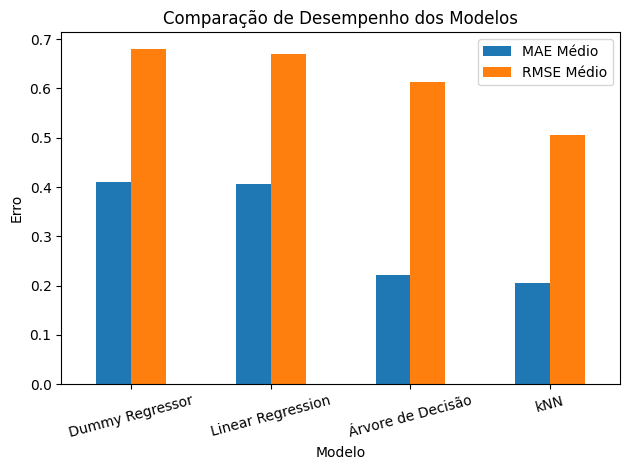

In [ ]:
dados_resultados.plot(x='Modelo', y=['MAE Médio', 'RMSE Médio'], kind='bar')
plt.ylabel("Erro")
plt.title("Comparação de Desempenho dos Modelos")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Resultados e Discussão**

A análise dos resultados revela que o modelo kNN obteve o melhor desempenho entre os modelos avaliados para a predição dos ratings de vinhos. Ele apresentou os menores valores médios tanto para o MAE (MAE=0.2044) quanto para o RMSE (RMSE=0.5050).

**kNN:** Demonstrou a maior precisão e robustez, indicando que suas previsões são, em média, as mais próximas dos ratings reais e com menos erros de grande magnitude. Isso sugere que a similaridade entre vinhos (características sensoriais, comerciais, etc.) é um bom preditor de seu rating.

**Árvore de Decisão:** Embora não tenha superado o kNN, a Árvore de Decisão apresentou um desempenho razoável, com MAE médio de 0.2215 e RMSE médio de 0.6149. Este modelo é conhecido por sua capacidade de capturar relações não-lineares, o que pode ser benéfico em dados complexos como os de vinhos.

**Regressão Linear:** Teve um desempenho inferior ao kNN e à Árvore de Decisão, com MAE médio de 0.4052 e RMSE médio de 0.6692. Isso pode indicar que a relação entre as características dos vinhos e seus ratings não é estritamente linear, ou que o modelo linear não consegue capturar a complexidade dos dados tão bem quanto os modelos baseados em vizinhança ou árvore.

**Dummy Regressor:** Como esperado, o Dummy Regressor, que serve como baseline, apresentou o pior desempenho com MAE médio de 0.7080 e RMSE médio de 0.9996. Este resultado confirma que os outros modelos estão de fato aprendendo padrões nos dados e não estão apenas gerando previsões aleatórias.

A escolha do kNN como o modelo mais adequado para este problema se justifica pela sua superioridade nas métricas de erro. Sua capacidade de generalização para dados não vistos, conforme indicado pela validação cruzada, o torna a melhor opção para prever com precisão os ratings de vinhos.

**Limitações**
**Dimensionalidade dos Dados:** O desempenho do kNN pode ser afetado em datasets com alta dimensionalidade (muitas características), pois a noção de "proximidade" se torna menos significativa. No entanto, para este dataset específico, parece ter funcionado bem.

**Escalabilidade do kNN:** Para datasets muito grandes, o kNN pode ser computacionalmente caro, pois requer o cálculo de distâncias para todos os vizinhos a cada previsão.

**Interpretabilidade:** Embora o kNN seja eficaz, sua interpretabilidade em termos de quais características específicas impulsionam o rating pode ser menor em comparação com modelos como a Regressão Linear ou Árvores de Decisão, que fornecem coeficientes ou regras de decisão claras.

**Próximos Passos**
**Otimização de Hiperparâmetros do kNN:** Realizar uma busca mais aprofundada por hiperparâmetros ótimos para o kNN (e.g., número de vizinhos 'k', métrica de distância) utilizando técnicas como GridSearchCV ou RandomizedSearchCV para potencialmente melhorar ainda mais seu desempenho.

**Engenharia de Features:** Explorar a criação de novas features a partir das existentes (e.g., combinações de características sensoriais) que possam capturar informações mais ricas e melhorar a capacidade preditiva dos modelos.

**Exploração de Outros Modelos:** Considerar a aplicação de outros modelos de aprendizado de máquina, como Gradient Boosting Regressor (XGBoost, LightGBM) ou redes neurais, que frequentemente oferecem alta performance em problemas de regressão.

**Análise de Erros:** Investigar os casos em que o kNN comete os maiores erros para identificar possíveis vieses ou padrões nos dados que não estão sendo bem capturados.

**Coleta de Mais Dados:** Se possível, a adição de mais dados de vinhos pode enriquecer o modelo e melhorar sua generalização, especialmente se incluir uma maior diversidade de vinhos e regiões.

# Resumo do Projeto: Análise Exploratória e Modelagem de Vinhos Premium Espanhóis

Este projeto tem como objetivo realizar uma análise exploratória e modelagem preditiva sobre um dataset de vinhos premium espanhóis. O foco está em entender as características que influenciam a qualidade (rating) dos vinhos e construir modelos capazes de prever essa avaliação.

**Passos Realizados:**

1.  **Importação de Bibliotecas:** Foram importadas as bibliotecas necessárias para manipulação de dados (pandas, numpy), visualização (matplotlib, seaborn) e modelagem/pré-processamento (sklearn).
2.  **Carregamento dos Dados:** O dataset foi carregado a partir de um link do GitHub para um DataFrame pandas.
3.  **Análise Inicial:** Foram exibidas as primeiras e últimas linhas do dataset, verificada a estrutura geral dos dados (`info()`) e a contagem de valores únicos por coluna (`nunique()`). Isso revelou a presença de valores faltantes e a natureza das variáveis (qualitativas/quantitativas).
4.  **Análise Descritiva:** As estatísticas descritivas foram calculadas para as variáveis qualitativas e quantitativas, fornecendo insights sobre a distribuição, média, desvio padrão, etc.
5.  **Visualização de Dados:** Foram gerados histogramas para variáveis quantitativas (`rating`, `acidity`, `body`) e gráficos de contagem para variáveis qualitativas (`winery`, `wine`, `year`, `country`, `region`, `type`) para entender suas distribuições. Um scatterplot foi usado para visualizar a relação entre `faixa_preco` e `num_reviews`, e um heatmap para mostrar a correlação entre as variáveis numéricas.
6.  **Tratamento de Valores Ausentes:** A porcentagem de valores nulos foi calculada. Foi realizada uma análise de correlação dos indicadores de valores nulos com outras variáveis para entender possíveis padrões de ausência. A imputação foi realizada utilizando KNNImputer para variáveis quantitativas (`year`, `body`, `acidity`) e a remoção das linhas com valores faltantes para a variável 'type'.
7.  **Pré-processamento de Variáveis Categóricas:** Variáveis categóricas com muitas categorias (`winery`, `wine`, `region`) foram agrupadas em categorias mais comuns e "Outros". A variável `country` foi removida por ter apenas um valor. Foi aplicado One-Hot Encoding nas variáveis categóricas transformadas (`vinhos_grupos`, `winery`, `wine`, `region`). A variável ordinal `faixa_preco` e a variável `year` (após agrupamento por bins) foram codificadas usando OrdinalEncoder.
8.  **Separação Treino/Teste e Padronização:** Os dados foram separados em conjuntos de treino e teste. As features (X) e o target (y - rating) foram padronizados usando `StandardScaler`.
9.  **Validação e Comparação de Modelos:** Foram avaliados quatro modelos de regressão (Linear Regression, Decision Tree, kNN, Dummy Regressor) utilizando K-Fold Cross-Validation. As métricas MAE e RMSE foram usadas para comparar o desempenho de cada modelo.
10. **Apresentação dos Resultados:** Os resultados médios de MAE e RMSE para cada modelo foram apresentados em uma tabela e visualizados em um gráfico de barras para facilitar a comparação.

**Conclusões Preliminares:**

*   A análise exploratória revelou insights sobre a distribuição de ratings, preços, popularidade e características sensoriais dos vinhos.
*   O tratamento de valores ausentes e o pré-processamento das variáveis foram realizados para preparar os dados para a modelagem.
*   A comparação dos modelos indicou que o kNN teve o melhor desempenho na previsão do rating dos vinhos, apresentando os menores erros médios.
*   Os próximos passos podem incluir a otimização de hiperparâmetros, engenharia de features e exploração de outros modelos para tentar melhorar ainda mais a performance preditiva.